The goals of this augmentation is to address the issue of the Pooling operation. In the Pooling operation, we have window which
is sliding at a fixed stride in non-overlapping path. Due to this, we are only considering information of odd spaced pixels and
 we are not considering information of even spaced pixels. Due to this, important texture information is being lost.
 This is mentioned by 
 "Zhang, Richard. "Making convolutional networks shift-invariant again." International conference on machine learning. PMLR, 2019"
 
 In this augmentation, we are trying incorporate the information of evenly spaced pixels onto the odd spaced pixels. We do this by adding the information of evenly placed pixels onto oddly placed pixels at a certain percentage. Due to this, during pooling operation, we are not leaving any information.

In [26]:
# Importing all the required libraries
import cv2 as cv
import matplotlib.pyplot as plt
import pathlib as pl
import numpy as np
import skimage.measure as sm
import copy
from skimage.metrics import structural_similarity as compare_ssim

In [43]:
# Using this function, we will encode information of all even spaced pixels into odd spaced pixels
# impact = It is parameter between range 0 - 1, 0 means no impact at all and 1 will highest image. But, in some image high 
# value of impact can product weird artifact at the brighter regions. So, it need to be chosen properly. The ideal range
# will be from 0.5 - 0.79
def information_encoder(image, impact):
    # The brightness of the image is reduced so that, we will not loss any information at higher bright areas, as 
    # this augmentation adds the neighboring pixels due to that brightness may increase and we may lose the information at
    # brighter regions
    image = image*0.6
    image = np.array(image, dtype="uint8")
    temp_img = copy.deepcopy(image)
    
    # Using slicing, we are encoding the information of even spaced pixels onto odd spaced pixels in both horizontal
    # and vertical directions
    for i in range(3):
        for j in range(1, temp_img.shape[0], 2):
            if j+1 < temp_img.shape[0]:
                    temp_img[:, j, i] = image[:, j, i] + (image[:, j+1, i])*impact
                    temp_img[:, j+1, i] = image[:, j+1, i] + (image[:, j, i])*impact
        for j in range(1, temp_img.shape[1], 2):
            if j+1 < temp_img.shape[1]:
                    temp_img[j, :, i] = image[j, :, i] + (image[j+1, :, i])*impact
                    temp_img[j+1, :, i] = image[j+1, :, i] + (image[j, :, i])*impact
    temp_img = np.clip(temp_img, 0, 255)
    return temp_img

In [44]:
img = r"D:\Samsung Prism\Datasets\Cat and Dog\Training\Cat\cat.2.jpg"
img = cv.imread(img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (300, 300))

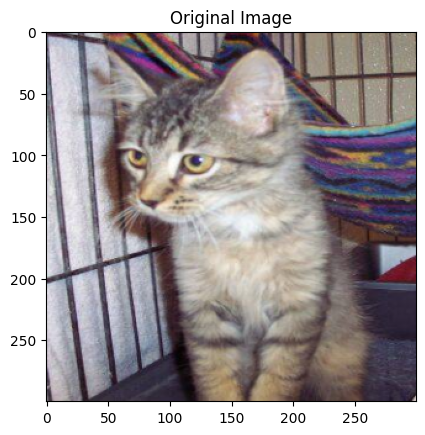

In [45]:
plt.title("Original Image")
plt.imshow(img)

In [53]:
result = information_encoder(img, 0.65)

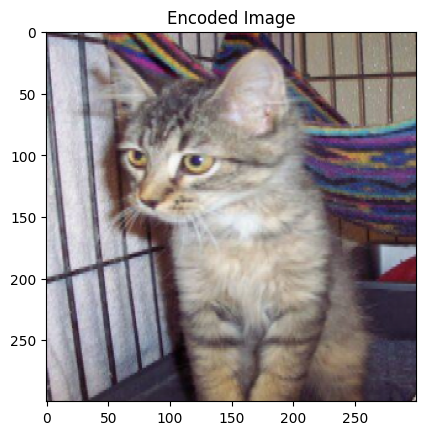

In [54]:
plt.title("Encoded Image")
plt.imshow(result)

In [55]:
# We can see the change in values at the same location as the same level of brightness
print(img[70:72, 70:72, 0]*0.6)
print(result[70:72, 70:72, 0])

[[64.8 64.8]
 [67.2 70.8]]
[[104 105]
 [111 116]]


In [56]:
# Structured Similarity Index of each color channel of both original image and encoded image
for i in range(3):
    score, dif = compare_ssim(img[:, :, i], result[:, :, i],full=True )
    print(score)

0.967721489815138
0.9679824005049489
0.9670968846570425


This reduction of 4-5% information carries the information of the texture which we may not at all compute in traditional pooling operation.

In [27]:
# For batch execution, pass the path of input file and output file

input_file_path = r"D:\Samsung Prism\Datasets\Hidden"
output_file_path = r"D:\Samsung Prism\Datasets\Temp"

pathlib_file = pl.Path(input_file_path)
all_img_path = list(pathlib_file.glob("*"))

counter = 0
for i in all_img_path:
    img = cv.imread(str(i))
    img = cv.resize(img, (300, 300))
    img = information_encoder(img, impact = 0.5)
    cv.imwrite(output_file_path + "\\" + "aug_ie_" + str(counter) + ".jpg", img)
    counter += 1